# Библиотека matplotlib

Есть несколько пакетов для построения графиков. Один из наиболее популярных - `matplotlib`. Если в `jupyter notebook` выполнить специальную `ipython` команду `%matplotlib inline`, то графики будут строиться в том же окне браузера. 

Есть другие варианты, в которых графики показываются в отдельных окнах. Это удобно для трёхмерных графиков - тогда их можно вертеть мышкой (в случае inline графиков это невозможно). 

Графики можно также сохранять в файлы, как в векторных форматах (`eps`, `pdf`, `svg`), так и в растровых (`png`, `jpg`; конечно, растровые форматы годятся только для размещения графиков на web-страницах). `matplotlib` позволяет строить двумерные графики практически всех нужных типов, с достаточно гибкой регулировкой их параметров; он также поддерживает основные типы трёхмерных графиков, но для серьёзной трёхмерной визуализации данных лучше пользоваться более мощными специализированными системами.

Некоторые функции отрисовки:

* `plt.scatter(x, y, params)` — нарисовать точки с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси
* `plt.plot(x, y, params)` — нарисовать график по точкам с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси. Точки будут соединятся в том порядке, в котором они указаны в этих массивах.
* `plt.fill_between(x, y1, y2, params)` — закрасить пространство между $y_1$ и $y_2$ по координатам из $x$.
*  `plt.pcolormesh(x1, x1, y, params)` — закрасить пространство в соответствии с интенсивностью $y$.
* `plt.contour(x1, x1, y, lines)` — нарисовать линии уровня. Затем нужно применить `plt.clabel`


Вспомогательные функции:

*    `plt.figure(figsize=(x, y))` — создать график размера $(x, y)$
*    `plt.show()` — показать график.
*    `plt.subplot(...)` — добавить подграфик
*    `plt.xlim(x_min, x_max)` — установить пределы графика по горизонтальной оси
*    `plt.ylim(y_min, y_max)` — установить пределы графика по вертикальной оси
*    `plt.title(name)` — установить имя графика
*    `plt.xlabel(name)` — установить название горизонтальной оси
*    `plt.ylabel(name)` — установить название вертикальной оси
*    `plt.legend(loc=...)` — сделать легенду в позиции loc
*    `plt.grid()` — добавить сетку на график
*    `plt.savefig(filename)` — сохранить график в файл


http://matplotlib.org/gallery.html (англ.) — тысячи примеров

У функций в `matplotlib` много параметров.
Для того, чтобы посмотреть все параметры, можно воспользоваться справкой


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install numpy

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy.random as npr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import *
from numpy.random import randn
from pylab import *
import scipy.stats as sps
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

Посмотрим, что можно делать с библиотекой

## Основы matplotlib

Списки $x$ и $y$ координат точек. Точки соединяются прямыми, т.е. строится ломаная линия.

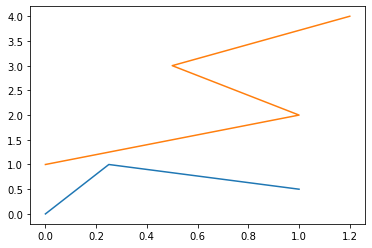

In [3]:
plt.plot([0, 0.25, 1], [0, 1, 0.5])
plt.plot([0, 1, 0.5, 1.2],[1, 2, 3, 4])
plt.show()

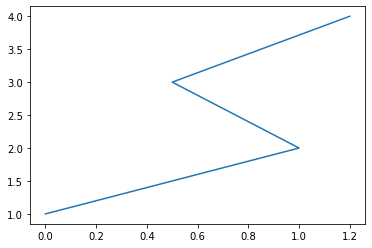

In [ ]:
plt.figure()
plt.plot([0, 1, 0.5, 1.2],[1, 2, 3, 4])
plt.show()

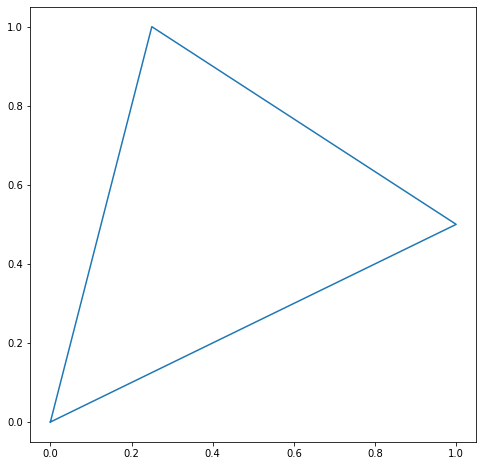

In [ ]:
# можно задавать размер изображения
plt.figure(figsize=(8,8))
plt.plot([0, 0.25, 1, 0], [0, 1, 0.5, 0])
plt.show()

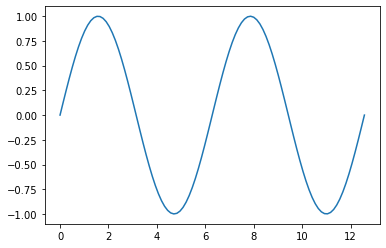

In [ ]:
# тут мы создаем массив numpy встроенной функцией
# используем функцию из numpy, которая создает массив из 100 точек в диапазоне от 0 до 4 Pi с равными шагами
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x))
plt.show()

Массив $x$ не обязан быть монотонно возрастающим. Можно строить любую параметрическую линию $x=x(t)$, $y=y(t)$.

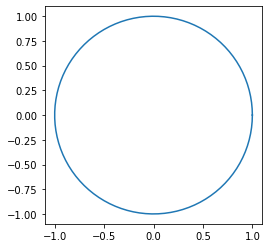

In [ ]:
t = np.linspace(0, 2 * np.pi, 100)

plt.figure()
# поэлементно приминяем функции к сгенерированному массиву данных
plt.plot(np.cos(t), np.sin(t))
plt.axes().set_aspect(1)
plt.show()

Чтобы окружности выглядели как окружности, а не как эллипсы, (а квадраты как квадраты, а не как прямоугольники), нужно установить aspect ratio, равный 1.

А вот одна из фигур Лиссажу.

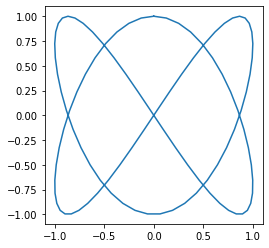

In [ ]:
plt.figure()
plt.plot(np.sin(2 * t), np.cos(3 * t))
plt.axes().set_aspect(1)
plt.show()

Для простой регулировки цветов и типов линий после пары $x$ и $y$ координат вставляется форматная строка. Первая буква определяет цвет (`'r'` - красный, `'b'` - синий и т.д.), дальше задаётся тип линии (`'-'` - сплошная, `'--'` - пунктирная, `'-.'` - штрих-пунктирная и т.д.).

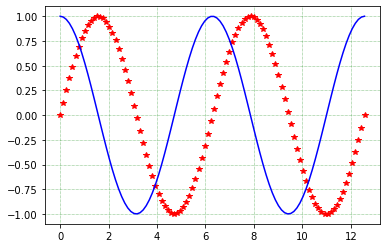

In [4]:
x = np.linspace(0, 4 * np.pi, 100)
plt.figure()
plt.grid(color='g',linestyle=':',linewidth=0.5)
plt.plot(x, np.sin(x), 'r*')
plt.plot(x, np.cos(x), 'b-')
plt.show()

Если в качестве "типа линии" указано `'o'`, то это означает рисовать точки кружочками и не соединять их линиями; аналогично, `'s'` означает квадратики. Конечно, такие графики имеют смысл только тогда, когда точек не очень много.

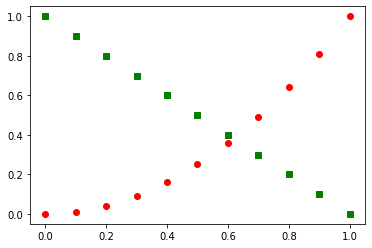

In [ ]:
x = np.linspace(0, 1, 11)

plt.figure()
plt.plot(x, x ** 2, 'ro')
plt.plot(x, 1 - x, 'gs')
plt.show()

### Задача 1

Создайте функцию, которая принимает на вход набор значний и возвращает

*   $x^2$, если $x<0$
*   $-x^3$, если $ 0 =< x =< 2$
*   $x^3$, если $x > 2$

Постройте получившиеся значения на графике, по оси х - входной массив, по оси y - результат функции


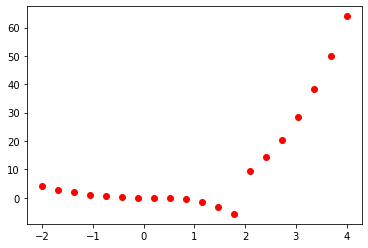

In [13]:
x = np.linspace(-2, 4, 20)

def func(x):
    # ваш код
  r = x**2
  if x >= 0 and x <= 2:
    r = -x**3
  elif x > 2:
    r = x**3
  return r
# отображение
plt.plot(x, [func(i) for i in x], 'ro')

### Задача 2

Отсортировать по убыванию возраста пассажиров титаника, отобразить на графике с подписью


Text(0, 0.5, 'возраст пассажира')

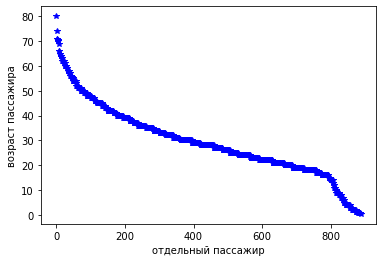

In [35]:
# импоритруем для загрузки данных
# import pandas as pd

# загрузим набор данных пассажиров титаника
df = pd.read_csv('./titanic.csv')
# возьмем возраста пассажиров
age = df['Age'].sort_values(ascending=False).tolist()

plt.plot([i for i, j in enumerate(age)], age, 'b*')
plt.xlabel('отдельный пассажир')
plt.ylabel('возраст пассажира')

# ваш код тут

## Обзор возможностей

Библиотека не ограничивается созданием только одним типом графика (line plot). Давайте рассмотрим примеры других типов:

Диаграмма разброса (scatter plot)

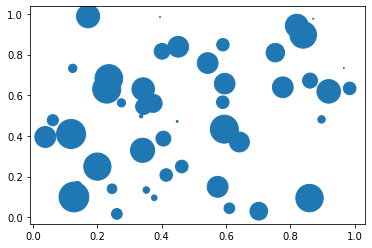

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123456)

# создадим 50 точек из нормального распределния
N = 50
# координаты х, у
x = np.random.rand(N)
y = np.random.rand(N)
# и их радиус
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
# отобразим
plt.scatter(x, y, s=area)
plt.show()

Столбчатые диаграммы (bar chart)

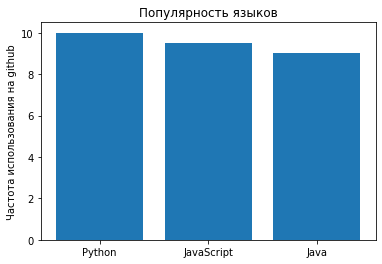

In [ ]:
# задаем подписи отображаемых объектов
objects = ('Python', 'JavaScript', 'Java')
# задаем значения позиций подписей (по х)
y_pos = np.arange(len(objects))
# задаем значения (по y)
popularity = [10.,9.5,9]
# создаем столбчатую диаграмму с вышеобозначенными значениями
plt.bar(y_pos, popularity)
# задаем подписи по оси х
plt.xticks(y_pos, objects)
# задаем название по y
plt.ylabel('Частота использования на github')
# задаем название всего графика
plt.title('Популярность языков')

plt.show()

Гистограммы (histogram)

In [ ]:
# среднее распределения
mu = 42 
# среднекадратичное отклонение
sigma = 3.14 
# значения, сгенерированные из нормального распределения
# подробнее о нормальном распределении - https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5
x = mu + sigma * np.random.randn(10000)
# отобразим несколько элементов
print(x)

[42.41725954 41.92561819 49.56796116 ... 39.85637708 39.80913606
 38.57082411]


(array([  2.,   1.,  10.,   9.,  10.,  17.,  23.,  29.,  44.,  54.,  67.,
        107., 138., 192., 220., 248., 334., 308., 401., 441., 454., 531.,
        506., 609., 622., 524., 558., 528., 447., 410., 428., 337., 338.,
        243., 189., 148., 133.,  91.,  76.,  54.,  39.,  25.,  19.,  15.,
          7.,   6.,   4.,   1.,   1.,   2.]),
 array([30.94444913, 31.39778093, 31.85111274, 32.30444454, 32.75777635,
        33.21110815, 33.66443996, 34.11777176, 34.57110357, 35.02443537,
        35.47776718, 35.93109898, 36.38443078, 36.83776259, 37.29109439,
        37.7444262 , 38.197758  , 38.65108981, 39.10442161, 39.55775342,
        40.01108522, 40.46441702, 40.91774883, 41.37108063, 41.82441244,
        42.27774424, 42.73107605, 43.18440785, 43.63773966, 44.09107146,
        44.54440327, 44.99773507, 45.45106687, 45.90439868, 46.35773048,
        46.81106229, 47.26439409, 47.7177259 , 48.1710577 , 48.62438951,
        49.07772131, 49.53105312, 49.98438492, 50.43771672, 50.89104853,
 

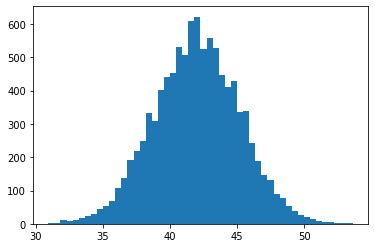

In [ ]:
num_bins = 50
# Гистограмма переменной показывает распределение частоты этой переменной
# (высота столбца - сколько элеметов попало в диапазон этого столбца)
# В этом случае мы указали num_bins - количество столбцов заранее
plt.hist(x, num_bins)

(array([  32.,  166.,  724., 1735., 2719., 2469., 1533.,  504.,  104.,
          14.]),
 array([30.94444913, 33.21110815, 35.47776718, 37.7444262 , 40.01108522,
        42.27774424, 44.54440327, 46.81106229, 49.07772131, 51.34438033,
        53.61103936]),
 <a list of 10 Patch objects>)

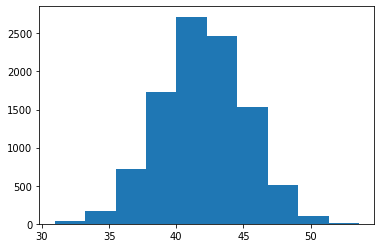

In [ ]:
# а можем оставить это на усмотрение алгоритма
plt.hist(x)

Круговые диаграммы (pie chart)

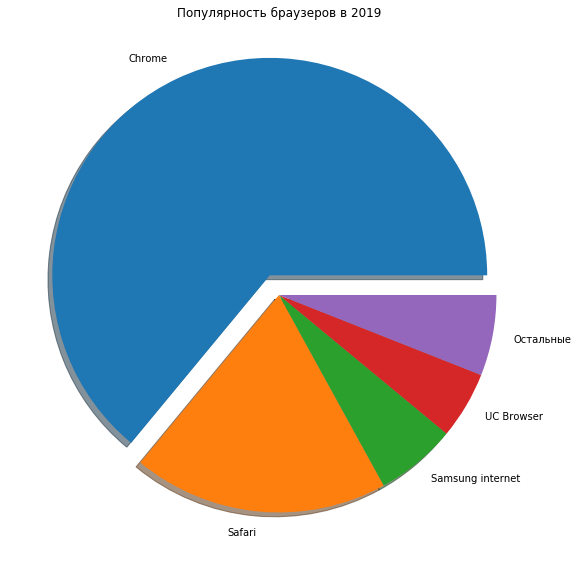

In [ ]:

# определяем названия браузеров
labels = 'Chrome', 'Safari', 'Samsung internet', 'UC Browser', 'Остальные'
# определяем значения для соответсвующих подписей
sizes = [64, 19, 6, 5, 6]
# определяем насколько мы ходим выделить каждый
explode = (0.1, 0, 0, 0, 0)
# создаем объект подграфика и ось с данными и подписями
fig1, ax1 = plt.subplots(figsize=(10, 10))
# функции имеют много различных настроек, к примеру тени
ax1.pie(sizes, explode=explode, labels=labels, shadow=True)
# задаем название всего графика
plt.title('Популярность браузеров в 2019')
# отображаем
plt.show()

### Задача 3

Построить гистограмму распределения по возрасту пассажиров, добавить подписи. Найти среднее и стандартное отклонение и медиану.

Подсказка:

Среднее и стандартное отклоенение - одни из основных статистик, которые находят при анализе данных. Грубо говоря стандартное отклонение показывает рассеянность значений случайной величины относительно её математического ожидания (среднее значение случайной величины).

$\mu$ = $\frac{\sum_i^n x_i}{n}$, где $x_i$ - элемент последовательности длинны $n$

$\sigma$ = $\sqrt{\frac{\sum_i^n (x_i - \mu)^2}{n}}$, где $x_i$ - элемент последовательности длинны $n$, а $\mu$ - среднее. (Из предположения, что данные являются генеральной совокупностью - совокупность всех объектов, относительно которых предполагается делать выводы при изучении конкретной задачи)

В случае, если данные выбраны из большого распредления (чаще всего на практике формула принимает вид:

$\sigma$ = $\sqrt{\frac{\sum_i^n (x_i - \mu)^2}{n-1}}$, где $x_i$ - элемент последовательности длинны $n$, а $\mu$ - среднее. Это стандартное отклонение на основании несмещённой оценки дисперсии.

Медиана ряда – это значение, которая делит его на две равные части (по количеству вариант).
Если число элементов нечетно, то медиана - среднее значение отортированного набора значений. Если нет, то среднее арифметическое двух цетнтральных.


(array([14., 11.,  7., 11.,  6.,  8.,  6.,  8.,  2.,  4.,  2.,  2.,  8.,
         5., 20., 52., 33., 23., 35., 39., 26., 35., 24., 21., 63., 27.,
        33., 21., 21., 19., 18., 21., 24., 12., 30., 18., 11., 17.,  7.,
         9., 16.,  6., 10., 20., 10.,  7.,  6.,  1.,  9.,  4.,  4.,  3.,
         5.,  7.,  3.,  5.,  2.,  3.,  3.,  2.,  0.,  0.,  3.,  3.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.42      ,  1.52527778,  2.63055556,  3.73583333,  4.84111111,
         5.94638889,  7.05166667,  8.15694444,  9.26222222, 10.3675    ,
        11.47277778, 12.57805556, 13.68333333, 14.78861111, 15.89388889,
        16.99916667, 18.10444444, 19.20972222, 20.315     , 21.42027778,
        22.52555556, 23.63083333, 24.73611111, 25.84138889, 26.94666667,
        28.05194444, 29.15722222, 30.2625    , 31.36777778, 32.47305556,
        33.57833333, 34.68361111, 35.78888889, 36.89416667, 37.99944444,
        39.10472222, 40.21      , 41.31527778, 42.42055556, 43.52583333,
      

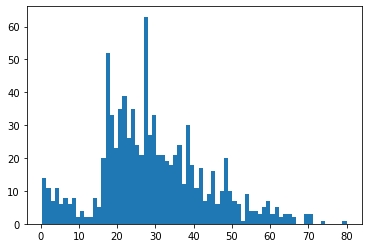

In [62]:
# Воспользуемся старыми данными возраста пассажиров титаника
df = pd.read_csv('./titanic.csv')
# возьмем возраста пассажиров
age = df['Age'].tolist()
set_age_round = set([round(i) for i in age])

plt.hist(age, len(set_age_round))

(array([25., 18.,  9., 11., 10.,  6.,  9., 26., 52., 56., 74., 60., 46.,
        63., 60., 42., 36., 45., 25., 36., 28., 16., 22., 22., 18., 13.,
        10.,  8.,  8.,  7.,  8.,  5.,  5.,  0.,  3.,  3.,  1.,  0.,  0.,
         1.]),
 array([ 0.42  ,  2.4095,  4.399 ,  6.3885,  8.378 , 10.3675, 12.357 ,
        14.3465, 16.336 , 18.3255, 20.315 , 22.3045, 24.294 , 26.2835,
        28.273 , 30.2625, 32.252 , 34.2415, 36.231 , 38.2205, 40.21  ,
        42.1995, 44.189 , 46.1785, 48.168 , 50.1575, 52.147 , 54.1365,
        56.126 , 58.1155, 60.105 , 62.0945, 64.084 , 66.0735, 68.063 ,
        70.0525, 72.042 , 74.0315, 76.021 , 78.0105, 80.    ]),
 <a list of 40 Patch objects>)

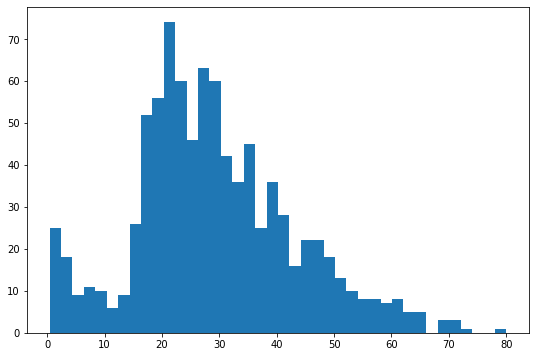

Мат ожидание

In [54]:
# Вариант через питон
mean = lambda x: sum(x)/len(x)
mean(age)

29.471443066516347

In [ ]:
# Вариант через библиотеки


29.471443066516347

Результат из предположения, что данные были выбраны из большой совокупности, является стандартным отклонением на основании несмещённой оценки дисперсии.

Стандартное отклонение

In [59]:
# Вариант через питон
# sqrt - корень из модуля math
variance = lambda x: (sum([(i - mean(x)) ** 2 for i in x]) / len(x)) ** 0.5
variance(age)

14.113945671023181

In [ ]:
# Вариант через библиотеки


14.121908405462554

Результат, когда данные являются генеральной совокупностью.

In [ ]:
# Вариант через питон


14.11394567102318

In [ ]:
# Вариант через библиотеки


14.113945671023174

Медиана

In [61]:
# Вариант через питон
def med(x):
    index = len(x) // 2
    if len(x) % 2:
        return sorted(x)[index]
    return sum(sorted(x)[index - 1:index + 1]) / 2

med(age)

28.0

In [ ]:
# Вариант через библиотеки


28.0

# Обработка числовых массивов даных

## Основы numpy

In [ ]:
# импортируем саму библиотеку
import numpy as np

### Массивы

Главный объект numpy - array. Массивы схожи со списками в python, но элементы массива должны иметь одинаковый тип данных (float и int). С массивами можно проводить числовые операции с большим объемом информации в разы быстрее и, главное, намного эффективнее чем со списками.

In [ ]:
a = np.array([1, 2, 3])
print(a, '|', type(a))

[1 2 3] | <class 'numpy.ndarray'>


Со всеми элементам можно получить доступ и манипулировать ими также, как вы бы это делали с обычными списками:

### Слайсинг 

In [ ]:
a[:2]

array([1, 2])

In [ ]:
a[::2]

array([1, 3])

Массивы могут быть и многомерными:

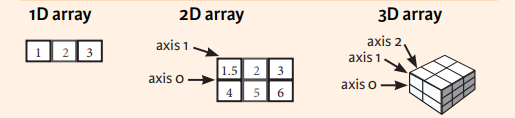

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)
print(a, '|', type(a))

[[1. 2. 3.]
 [4. 5. 6.]] | <class 'numpy.ndarray'>


In [ ]:
a[1,2]

6.0

Array slicing работает с многомерными массивами аналогично, как и с одномерными, применяя каждый срез, как фильтр для установленного измерения. Используйте ":" в измерении для указывания использования всех элементов этого измерения:

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)
# выбрали элементы с шагом 2 второй строки массива
a[1,::2]

array([4., 6.])

### Методы

Чем так хорош numpy?

* Матричные и веркторные операции
* Методы

### Векторные операции

Посмотрим на базовые математические операции приминительно к массивам numpy. Операции проходят поэлементно, существенно быстрее python. Аналогичное работает и с многомерными массивами.

In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

In [ ]:
a + b

array([5, 7, 9])

In [ ]:
a - b

array([-3, -3, -3])

In [ ]:
a * b

array([ 4, 10, 18])

In [ ]:
a / b

array([0.25, 0.4 , 0.5 ])

In [ ]:
a ** b

array([  1,  32, 729])

In [ ]:
a == b

array([False, False, False])

In [ ]:
a < 2

array([ True, False, False])

### Матричные операции операции

С перемножением матриц мы делатльно познакомимся далее в ходе курса, механизм (перемножений) будет понятен из домашнего задания.

In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

In [ ]:
# матричное перемножение
a @ b

array([[19, 22],
       [43, 50]])

In [ ]:
# матричное перемножение
np.dot(a, b)

array([[19, 22],
       [43, 50]])

In [ ]:
print('исходная:', a)
print('транспонированная:', a.T)

исходная: [[1 2]
 [3 4]]
транспонированная: [[1 3]
 [2 4]]


In [ ]:
from numpy.linalg import inv
# обратная матрица, очень важная операция в линале!
inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

Матрицы (или наборы данных) можно объединить:

In [ ]:
np.concatenate((a,b))

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [ ]:
# не обязательно добавлять строки, можно столбцы
np.concatenate((a,b), axis=1)

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

Метод shape возвращает количество строк и столбцов в матрице:

In [ ]:
a.shape

(2, 2)

float64, это числовой тип данных в numpy, который используется для хранения вещественных чисел двойной точности по аналогии с float в Python.

Метод dtype возвращает тип переменных, хранящихся в массиве:

In [ ]:
a.dtype

dtype('int64')

Метод len возвращает длину первого измерения (оси):

In [ ]:
len(a)

2

По аналогии с list можно проверять вхождение элемента

In [ ]:
6 in a

False

### Reshape

Массивы можно переформировать при помощи метода, который задает новый многомерный массив. Следуя следующему примеру, мы переформатируем одномерный массив из 12 элементов в двумерный массив, состоящий из 4 строк и 3 столбцов:

(метод reshape создает новый массив, а не модифицирует оригинальный)

In [ ]:
a = np.array(range(12), float)
a

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [ ]:
a = a.reshape((4, 3))
a

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

### Работа по ссылке

Работа по ссылке как и в python:

In [ ]:
a = np.array([1, 2, 3])
b = a
c =  a.copy()

# меняем 0й элемент
a[0] = 0

print(f'Измененный массив а {a}')
print(f'Измененный массив b {b}  <-- изменился по ссылке т.к. поменяти 0й элемент а')
print(f'Измененный массив c {c}  <-- создали копию в памяти')

Измененный массив а [0 2 3]
Измененный массив b [0 2 3]  <-- изменился по ссылке т.к. поменяти 0й элемент а
Измененный массив c [1 2 3]  <-- создали копию в памяти


Можно преобразовать обратно в список:

In [ ]:
a.tolist()

[0, 2, 3]

Можно сделать и обратное: конвертируем в одномерный

In [ ]:
a.flatten()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

### Объединение

Массивы можно объединять

In [ ]:
a = np.array([[1, 2], [3, 4]], float)
b = np.array([[5, 6], [7,8]], float)
np.concatenate((a,b))

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.]])

Если массив не одномерный, можно задать ось, по которой будет происходить соединение. По умолчанию (не задавая значения оси), соединение будет происходить по первому измерению:

In [ ]:
np.concatenate((a,b), axis=0)

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.]])

In [ ]:
np.concatenate((a,b), axis=1)

array([[1., 2., 5., 6.],
       [3., 4., 7., 8.]])

## Основы pandas

In [ ]:
# импортируем библиотеку
import pandas as pd

### Series

Одномерный набор данных. Отсутствующий данные записываются как `np.nan`, они не участвуют в вычислении средних, среднеквадратичных отклонений и т.д.

In [ ]:
l=[1,3,5,np.nan,6,8]
s=pd.Series(l)
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### Полезная информация о датафрейме


Основная информация о наборе данных: среднее, среднеквадратичное отклонение, минимум, максимум, медиана (которая отличается от среднего для несимметричных распределений).

In [ ]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

### Индексация

Индексация по аналогии:

In [ ]:
s[2]

5.0

In [ ]:
s[2]=7
s

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [ ]:
s[2:5]

2    7.0
3    NaN
4    6.0
dtype: float64

In [ ]:
s1=s[1:]
s1

1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [ ]:
s2=s[:-1]
s2

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
dtype: float64

### Сложение


В сумме `s1+s2` складываются данные с одинаковыми индексами. Поскольку в `s1` нет данного и индексом 0, а в `s2` - с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`.

In [ ]:
s1+s2

0     NaN
1     6.0
2    14.0
3     NaN
4    12.0
5     NaN
dtype: float64


К наборам данных можно применять функции из `numpy`

In [ ]:
np.exp(s)

0       2.718282
1      20.085537
2    1096.633158
3            NaN
4     403.428793
5    2980.957987
dtype: float64

### Индексация

При создании набора данных s мы не указали, что будет играть роль индекса. По умолчанию это последовательность целых чисел 0, 1, 2, ...

In [ ]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


Но можно создавать наборы данных с индексом, заданным списком.

In [ ]:
i=list('abcdef')
i

['a', 'b', 'c', 'd', 'e', 'f']

In [ ]:
s=pd.Series(l,index=i)
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

Если индекс - строка, то вместо s['c'] можно писать s.c.

In [ ]:
s.c

5.0

Набор данных можно создать из словаря.

In [ ]:
s=pd.Series({'a':1,'b':2,'c':0})
s

a    1
b    2
c    0
dtype: int64

Можно отсортировать набор данных.

In [ ]:
s.sort_values()

c    0
a    1
b    2
dtype: int64

Роль индекса может играть, скажем, последовательность дат (или времён измерения и т.д.).

In [ ]:
d=pd.date_range('20160101',periods=10)
d

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
s=pd.Series(np.random.normal(size=10),index=d)
s

2016-01-01   -0.108746
2016-01-02   -1.340863
2016-01-03    1.695632
2016-01-04    0.750345
2016-01-05   -0.960366
2016-01-06    1.068938
2016-01-07   -0.815169
2016-01-08   -1.582021
2016-01-09   -1.731143
2016-01-10    0.130816
Freq: D, dtype: float64

Операции сравнения возвращают наборы булевых данных.

In [ ]:
s>0

2016-01-01    False
2016-01-02    False
2016-01-03     True
2016-01-04     True
2016-01-05    False
2016-01-06     True
2016-01-07    False
2016-01-08    False
2016-01-09    False
2016-01-10     True
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть True.

In [ ]:
s[s>0]

2016-01-03    1.695632
2016-01-04    0.750345
2016-01-06    1.068938
2016-01-10    0.130816
dtype: float64

## DataFrame

Двумерная таблица данных. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [ ]:
d={'one':pd.Series([1,2,3],index=['a','b','c']),
   'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}
df=pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


### Индексация, слайсинг и доступ к переменным

In [ ]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [ ]:
df.columns

Index(['one', 'two'], dtype='object')

Если в качестве индекса указать имя столбца, получится одномерный набор данных.

In [ ]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [ ]:
df.one

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [ ]:
df['one']['c']

3.0


Однако если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [ ]:
df['b':'d']

,one,two
b,2.0,2
c,3.0,3
d,NaN,4



Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным.

In [ ]:
df[1:3]

,one,two
b,2.0,2
c,3.0,3



Логичнее работает атрибут `loc`: первая позиция - всегда индекс строки, а вторая - столбца.

In [ ]:
df.loc['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [ ]:
df.loc['b','one']

2.0

In [ ]:
df.loc['a':'b','one']

a    1.0
b    2.0
Name: one, dtype: float64

In [ ]:
df.loc['a':'b',:]

,one,two
a,1.0,1
b,2.0,2


In [ ]:
df.loc[:,'one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

К таблице можно добавлять новые столбцы.

In [ ]:
df['three']=df['one']*df['two']
df['flag']=df['two']>2
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True


Также можно удалять имеющиеся.

In [ ]:
#del df['two']
df['foo']=0.
# df.drop(['foo'], axis=1)
del df['foo']
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True


### Функции для сортировки

In [ ]:
mask = df.apply(lambda x: x['one'] < 1.5 or x['two'] > 2.5, axis=1)
mask

a     True
b    False
c     True
d     True
dtype: bool

In [ ]:
df[mask]

,one,two
a,1.0,1
c,3.0,3
d,NaN,4


### Объединение и добавление новых столбцов


Добавим копию столбца `one`, в которую входят только строки до второй.

In [ ]:
df['one_tr']=df['one'][:2]
df

,one,two,one_tr
a,1.0,1,1.0
b,2.0,2,2.0
c,3.0,3,NaN
d,NaN,4,NaN


In [ ]:
df1=df.loc[:,['one','one_tr']]
df1

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN


Можно объединять таблицы по вертикали и по горизонтали.

In [ ]:
df2=pd.DataFrame({'one':{'a':0,'b':1},'one_tr':{'b':2}})
df2

,one,one_tr
a,0,NaN
b,1,2.0


In [ ]:
df3 = pd.concat([df,df2], axis=0)
df3

,flag,one,one_tr,three,two
a,False,1.0,1.0,1.0,1.0
b,False,2.0,2.0,4.0,2.0
c,True,3.0,NaN,9.0,3.0
d,True,NaN,NaN,NaN,4.0
a,NaN,0.0,NaN,NaN,NaN
b,NaN,1.0,2.0,NaN,NaN


# Полезные ссылки и доп материалы

Освоить основы каждой библиотеки за 10-15 минут:
#### numpy
https://docs.scipy.org/doc/numpy/user/quickstart.html
#### pandas
https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

#### matplotlib

https://matplotlib.org/3.1.1/tutorials/index.html

# Exploratory data analysis 1

## Предобработка данных
скачайте данные с помощью pd.read_csv по ссылке https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data и уберите заголовок

In [ ]:
# Считываем данные
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

# Назначаем имена колонок
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')

df.columns = columns.split() #этот метод разделит датасет по колонкам как в массиве columns

df.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Исследование данных

Основные пункты, которые надо исследовать в ходе обработки данных:

* основные статистики
* распределения данных
* пропуски
* корректность заполнения данных с точки зрения здравого смысла (например, нету ли возраста > 150 лет)


Функция describe отобразит основные статистики по каждому столбцу (тип данных которого числовой). По этим показателям можно понять корректность данных, их разброс.

In [ ]:
df.describe()

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06b4d76b38>,
      dtype=object)

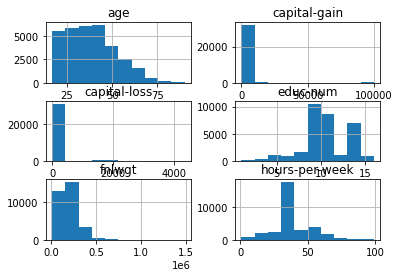

In [ ]:
# встроенный матплотлиб позволит отобразить их вместе с графиками!
# посмотрим на гистограммы
df.hist()

In [ ]:
# найдем ненулевые значения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   educ-num        32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# найдем ненулевые значения
df.notnull().head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
df[df.notnull()].head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
# видим, что пиропущенных значений нет
df.notnull().describe()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
freq,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560


In [ ]:
# проверим, зананим одну строчку
df['education'][0] = np.NaN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.notnull().describe()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1
top,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
freq,32560,32560,32560,32559,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560


In [ ]:
df['education'][0] = ' Bachelors'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Кодировка данных

### Нахождение нужных типов данных

Посмотрим на типы данных наших столбцов

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
educ-num           int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [ ]:
# найдем те колонки, у которых тип данных - строка
df.dtypes == object

age               False
workclass          True
fnlwgt            False
education          True
educ-num          False
marital-status     True
occupation         True
relationship       True
race               True
sex                True
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary             True
dtype: bool

In [ ]:
# отсортируем только строчные
df.dtypes[df.dtypes == object]

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
salary            object
dtype: object

In [ ]:
# отсортируем только строчные
df.dtypes[df.dtypes == object]

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
salary            object
dtype: object

In [ ]:
# найдем их названия
df.dtypes[df.dtypes == object].index

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')

In [ ]:
# Используем их для отображения датасета

df[list( df.dtypes[df.dtypes == object].index )]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


### Нахождение уникальных записей

In [ ]:
# найдем все уникальные записи в одной из колонок
set(df['workclass'])

{' ?',
 ' Federal-gov',
 ' Local-gov',
 ' Never-worked',
 ' Private',
 ' Self-emp-inc',
 ' Self-emp-not-inc',
 ' State-gov',
 ' Without-pay'}

Реализуем функцию, которая каждый текстовый элемент набора данных кодировала бы уникальникальным числом. Таким образом на выходе у Вас должен быть словарь кодировщиков, который, при нужде, переведет все закодированные значения обратно в текст + сам закодированный датасет.

Аналогично реализовать функцию, которая совершала бы обратную операцию декодирования.

Так же нужно создать отдельную функцию, которая бы кодировала датасет с учетом ктодирвок. Это можнт понадобиться в ситуации, когда нужно закодировать новые данные в соответсвии со старым форматом (на котором обучались алгоритмы).

Таким образом набор значения 

```
{
 ' ?',
 ' Federal-gov',
 ' Local-gov',
 ' Never-worked',
 ' Private',
 ' Self-emp-inc',
 ' Self-emp-not-inc',
 ' State-gov',
 ' Without-pay'}
```

 перейдут в


```
{
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9}
```

А если встречается новое слово, которого нет в изначальном наборе, а нужно закодировать в старом формате - ставим 0.

Давайте посмотрим на одну колонку, чтоб понимать, что мы хотим получить:

In [ ]:
for i, n in enumerate(set(df['workclass'])):
    print(f'Чем кодируем {i+1}, что кодируем: {n} ')

Чем кодируем 1, что кодируем:  State-gov 
Чем кодируем 2, что кодируем:  Federal-gov 
Чем кодируем 3, что кодируем:  Local-gov 
Чем кодируем 4, что кодируем:  Without-pay 
Чем кодируем 5, что кодируем:  Never-worked 
Чем кодируем 6, что кодируем:  ? 
Чем кодируем 7, что кодируем:  Self-emp-not-inc 
Чем кодируем 8, что кодируем:  Private 
Чем кодируем 9, что кодируем:  Self-emp-inc 


In [ ]:
# создаем генератор словаря,
# ключ - то, что кодируем (слово)
# значение - то, чем кодируем (уникальная цифра)
# пройдемся по нашим уникальным значениям через enumerate (распаковывая индекс и слово)
encoder = {word:index + 1 for index, word in enumerate(set(df['workclass']))}

print(encoder, end = '\n')
for elem in encoder:
    print(elem, encoder[elem])

print()

# в pandas есть функция map, которая сама заменит каждое слово по выданному словарю
print('Посмотрим на результат применения к копии первого столбца:')
df['workclass'].copy().map(encoder)

{' State-gov': 1, ' Federal-gov': 2, ' Local-gov': 3, ' Without-pay': 4, ' Never-worked': 5, ' ?': 6, ' Self-emp-not-inc': 7, ' Private': 8, ' Self-emp-inc': 9}
 State-gov 1
 Federal-gov 2
 Local-gov 3
 Without-pay 4
 Never-worked 5
 ? 6
 Self-emp-not-inc 7
 Private 8
 Self-emp-inc 9

Посмотрим на результат применения к копии первого столбца:


0        7
1        8
2        8
3        8
4        8
        ..
32555    8
32556    8
32557    8
32558    8
32559    9
Name: workclass, Length: 32560, dtype: int64

Теперь объединим это все в одну функцию кодировки для каждой колонки с текстовым типом данных:

In [ ]:
# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {} # создаем словарь кодировщиков (пары название столбца:кодировщик)
    # проходимся по названиям колонок
    for column in result.columns:
        # если тип данных текущей колонки в цикле строковый, то
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            # находим уникальные значения в столбце
            uniqe_vals = set(result[column])
            # создаем словарь из значений (по примеру выше)
            coder = {word:index + 1 for index, word in enumerate(uniqe_vals)}
            # записываем результат (кодировщик) в словарь кодировщиков
            encoders[column] = coder
            result[column] = result[column].map(encoders[column])

    return result, encoders

In [ ]:
df_encoded, encoders = number_encode_features(df)

In [ ]:
# отобразим encoders
encoders['education']

{' 10th': 10,
 ' 11th': 9,
 ' 12th': 3,
 ' 1st-4th': 11,
 ' 5th-6th': 16,
 ' 7th-8th': 2,
 ' 9th': 8,
 ' Assoc-acdm': 4,
 ' Assoc-voc': 6,
 ' Bachelors': 14,
 ' Doctorate': 13,
 ' HS-grad': 5,
 ' Masters': 15,
 ' Preschool': 12,
 ' Prof-school': 7,
 ' Some-college': 1}

In [ ]:
# и закодированные данные
df_encoded

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,7,83311,14,13,2,3,6,5,1,0,0,13,1,2
1,38,8,215646,5,9,5,9,3,5,1,0,0,40,1,2
2,53,8,234721,9,7,2,9,6,1,1,0,0,40,1,2
3,28,8,338409,14,13,2,5,5,1,2,0,0,40,25,2
4,37,8,284582,15,14,2,3,5,5,2,0,0,40,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,8,257302,4,12,2,1,5,5,2,0,0,38,1,2
32556,40,8,154374,5,9,2,7,6,5,1,0,0,40,1,1
32557,58,8,151910,5,9,3,14,2,5,2,0,0,40,1,2
32558,22,8,201490,5,9,4,14,1,5,1,0,0,20,1,2


### Декодировка датасета

Напишем обратную функцию, которая принимает на вход закодированный датасет и набор кодировщиков

Как и прежде, для начала, рассмотрим на примере одной колонки:

In [ ]:
# возьмем копию данных
copy = df['education'].copy()
# закодируем
copy = copy.map(encoders['education'])
# heh[0] = 'test'
# "перевернем" ключи и значения кодировщиков для обратной операции
print({encoders['education'][word]: word for word in encoders['education']})
# применим функцию для декодирования
decoded = copy.map({encoders['education'][word]: word for word in encoders['education']})
decoded

{1: ' Some-college', 2: ' 7th-8th', 3: ' 12th', 4: ' Assoc-acdm', 5: ' HS-grad', 6: ' Assoc-voc', 7: ' Prof-school', 8: ' 9th', 9: ' 11th', 10: ' 10th', 11: ' 1st-4th', 12: ' Preschool', 13: ' Doctorate', 14: ' Bachelors', 15: ' Masters', 16: ' 5th-6th'}


0          Bachelors
1            HS-grad
2               11th
3          Bachelors
4            Masters
            ...     
32555     Assoc-acdm
32556        HS-grad
32557        HS-grad
32558        HS-grad
32559        HS-grad
Name: education, Length: 32560, dtype: object

In [ ]:
# Напишем функцию, которая принимает на вход DataFrame, декодирует значения
# и возвращает DataFrame и сами кодировщики.
def decode_df(encoded_df, encoders):
    # создаем копию закодированного датасета
    decoded_df = encoded_df.copy()
    # проходимся по названиям колонок (ключам) словаря кодировщиков
    for column_name in encoders:
        # выбираем колонку по названию и заменяем ее кодировщиком,
        # в котором мы перевернули ключи и значения (для обратной операции)
        decoded_df[column_name] = decoded_df[column_name].map(
            {encoders[column_name][word]: word for word in encoders[column_name]})
    return decoded_df

decoded_df = decode_df(df_encoded, encoders)
decoded_df.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
# по идее закодированны и декодированный обратно датасет - это исходный, проверим
df == decoded_df

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
32556,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
32557,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
32558,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


### Кодировка при поступлении новых значений "старыми"

In [ ]:
# а что будет, если одно будет "новым"?
# возьмем копию данных
copy = df['education'].copy()
# заменим первую строку на test
copy[0] = 'test'
# закодируем
copy = copy.map(encoders['education'])
print('после кодировки')
print(copy)
# heh[0] = 'test'
# "перевернем" ключи и значения кодировщиков для обратной операции
print({encoders['education'][word]: word for word in encoders['education']})
# применим функцию для декодирования
decoded = copy.map({encoders['education'][word]: word for word in encoders['education']})
print('после декодировки')
decoded

после кодировки
0         NaN
1         5.0
2         9.0
3        14.0
4        15.0
         ... 
32555     4.0
32556     5.0
32557     5.0
32558     5.0
32559     5.0
Name: education, Length: 32560, dtype: float64
{1: ' Some-college', 2: ' 7th-8th', 3: ' 12th', 4: ' Assoc-acdm', 5: ' HS-grad', 6: ' Assoc-voc', 7: ' Prof-school', 8: ' 9th', 9: ' 11th', 10: ' 10th', 11: ' 1st-4th', 12: ' Preschool', 13: ' Doctorate', 14: ' Bachelors', 15: ' Masters', 16: ' 5th-6th'}
после декодировки


0                NaN
1            HS-grad
2               11th
3          Bachelors
4            Masters
            ...     
32555     Assoc-acdm
32556        HS-grad
32557        HS-grad
32558        HS-grad
32559        HS-grad
Name: education, Length: 32560, dtype: object

Мы получили NaN значение, которое не подходит для анализа алгоритмами машинного обучения, чтоб модель не сломалась в ходе анализа заменим все NaN (значения, которых не было в кодировщиках) на нули. По этой причине в реальных задачах так важно постоянно переобучать модели и расширять словарь новых признаков.

In [ ]:
decoded.fillna(0)

0                  0
1            HS-grad
2               11th
3          Bachelors
4            Masters
            ...     
32555     Assoc-acdm
32556        HS-grad
32557        HS-grad
32558        HS-grad
32559        HS-grad
Name: education, Length: 32560, dtype: object

Теперь создадим копию исходного датасета в которой поменяем значения Education в первой строке и закодируем такой датасет "старыми" кодировщиками.

In [ ]:
df_new = df.copy()
df_new['education'][0] = 'test'
df_new.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,test,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def encode_with_old(new_df, encoders):
    result = new_df.copy() # копируем нашу исходную таблицу

    # проходимся по названиям колонок
    for column in result.columns:
        # если тип данных текущей колонки в цикле строковый, то
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            result[column] = result[column].map(encoders[column])
            # если втретили NaN в столбце - заменим на 0
            result[column] = result[column].fillna(0)

    return result

encode_with_old(df_new, encoders)

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,7,83311,0.0,13,2,3,6,5,1,0,0,13,1,2
1,38,8,215646,5.0,9,5,9,3,5,1,0,0,40,1,2
2,53,8,234721,9.0,7,2,9,6,1,1,0,0,40,1,2
3,28,8,338409,14.0,13,2,5,5,1,2,0,0,40,25,2
4,37,8,284582,15.0,14,2,3,5,5,2,0,0,40,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,8,257302,4.0,12,2,1,5,5,2,0,0,38,1,2
32556,40,8,154374,5.0,9,2,7,6,5,1,0,0,40,1,1
32557,58,8,151910,5.0,9,3,14,2,5,2,0,0,40,1,2
32558,22,8,201490,5.0,9,4,14,1,5,1,0,0,20,1,2


# Exploratory data analysis 2

Давайте рассмотрим пример исследования набора данных на примере данных о пассажирах Титаника.

In [ ]:
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

--2020-05-08 21:45:03--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  43.19K  --.-KB/s    in 0.04s   

2020-05-08 21:45:03 (1.04 MB/s) - ‘titanic.csv’ saved [44225/44225]



In [ ]:
!ls 

sample_data  titanic.csv


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

Набор данных включает в себя два CSV-файла. Обучающий набор содержит признак Survived для каждого пассажира, обозначающий, выжил данный пассажир или нет (0 для умерших, 1 для выживших).

Каждая строчка наборов данных содержит следующие поля:

* Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

* Name — имя;

* Sex — пол;

* Age — возраст;

* SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

* Parch — количество родителей, детей (в том числе приемных) на борту титаника;

* Ticket — номер билета;

* Fare — плата за проезд;

* Cabin — каюта;

* Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

* Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

In [ ]:
data = pd.read_csv('titanic.csv', sep=',', header='infer')
data.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
data['Survived'].head() # можно выбрать один столбец, выведет Series


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
data[['Survived', 'Name']] # несколько полей, выведет сокращённый Dataframe

,Survived,Name
0,0,Mr. Owen Harris Braund
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...
2,1,Miss. Laina Heikkinen
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle
4,0,Mr. William Henry Allen
5,0,Mr. James Moran
6,0,Mr. Timothy J McCarthy
7,0,Master. Gosta Leonard Palsson
8,1,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson
9,1,Mrs. Nicholas (Adele Achem) Nasser


In [ ]:
data.columns # все колонки

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

### Типы данных и полезная информация

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
type(data['Siblings/Spouses Aboard'])

pandas.core.series.Series

По аналогии с Series можно накладывать условия на данные

In [ ]:
data[data['Age']>70][data['Pclass']==1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
95,0,1,Mr. George B Goldschmidt,male,71.0,0,0,34.6542
490,0,1,Mr. Ramon Artagaveytia,male,71.0,0,0,49.5042
627,1,1,Mr. Algernon Henry Wilson Barkworth,male,80.0,0,0,30.0000


In [ ]:
data.shape

(887, 8)

In [ ]:
data.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [ ]:
data['Age'].mean()

29.471443066516347

In [ ]:
data['Age'].var()

199.428297012274

In [ ]:
data['Age'].std()

14.121908405462555

In [ ]:
data.describe() # сводные данные

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [ ]:
data[['Age', 'Fare']].mean()

Age     29.471443
Fare    32.305420
dtype: float64

### Гистограммы

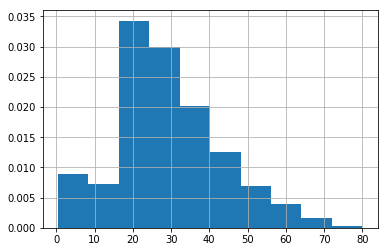

In [ ]:
data['Age'].hist(density=True) # density=True выведет долю, а не количество

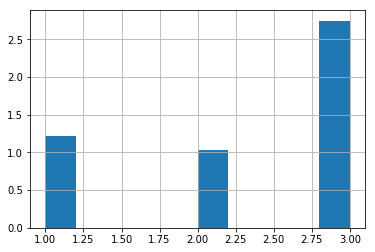

In [ ]:
data['Pclass'].hist(density=True)

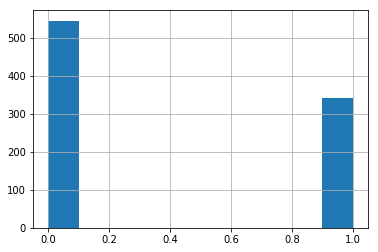

In [ ]:
data['Survived'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd15a08c4a8>,
      dtype=object)

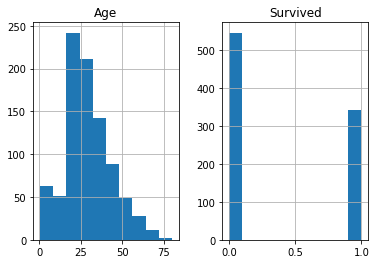

In [ ]:
data[['Age', 'Survived']].hist()

In [ ]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           464
        1           109
Name: Survived, dtype: int64

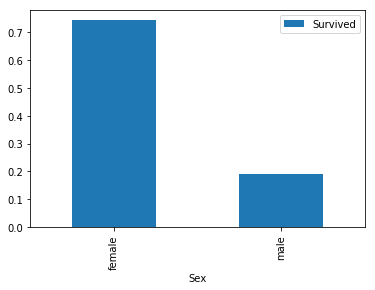

In [ ]:
data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar()

In [ ]:
data.drop_duplicates()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


# Доп задания на закрепление материала

In [4]:
# загрузим библиотеки
import numpy as np
import pandas as pd

## Задание 1

Создайте массив массив из 100 элементов (от 1 до 100), переформатируйте в формат (10 * 10), сделайте слайсинг с шагом 2 по каждой оси.

In [5]:
a = np.array([i for i in range(1, 101)])
a = a.reshape((10, 10))
print(a[::2,::2])

[[ 1  3  5  7  9]
 [21 23 25 27 29]
 [41 43 45 47 49]
 [61 63 65 67 69]
 [81 83 85 87 89]]


## Задание 2

Написать функцию, которая по заданной длине последовательности находит среднее арифметическое ее членов.

Реализуйте задачу с и без помощи numpy, сравните время выполнения

In [ ]:
# решение с использованием numpy
# для оценки времени исоплнения блока
%%time
# зададим длину нашей последовательности
dlina_posl = 100_000_000

# ваш код тут
# a = lambda d: np.array(range(d)).sum() / d
# print(a(dlina_posl))
print(np.array(range(dlina_posl)).mean())

49999999.5
CPU times: user 14.5 s, sys: 4.55 s, total: 19 s
Wall time: 18.9 s


In [ ]:
# решение без использования numpy
# для оценки времени исоплнения блока
%%time

def f(d):
  a = [i for i in range(d)]
  count = 0
  for i in a:
    count += i
  return count / d

o = lambda d: sum([i for i in range(d)]) / d


# print(f(dlina_posl))
print(o(dlina_posl))

# ваш код тут

49999999.5
CPU times: user 6.81 s, sys: 1.67 s, total: 8.48 s
Wall time: 8.47 s


## Задание 3

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5

In [ ]:
# задано изначально
r = np.random.RandomState(1)
s=pd.Series(r.uniform(0, 10, 100))
sort_s = s.sort_values()
b = sort_s[sort_s>5]
print(b.index[0])



<class 'pandas.core.series.Series'>
67


## Задание 4

Предположим, что мы наблюдаем за некоторым признаком нашего датасета, но в данных есть пропуски. Ваша задача: реализовать алгоритм заполнения пропущенных значений последним известным с помощью средств python и pandas. (подсказка: вам может помочь функция np.isnan(), которая возвращает True, если число - nan. Для реализации с пандас стоит посмотреть на метод .fillna).

Изначальный код с инициализацией такого датасета предоставлен.

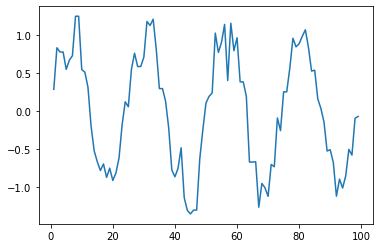

In [14]:
# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None
# создадим датафрейм
df = pd.DataFrame({'target':a})
# print(a)

# ваш код тут
# pandas
df = df.fillna(method="ffill")
# python
b = a.copy()
for i, j in enumerate(b):
  if np.isnan(j):
      if i > 0:
          a[i] = a[i - 1]
      else:
          a[i] = a[i + 1]
df2 = pd.DataFrame({'target':a})
# отобразим
plt.plot(df.target.values)
# plt.plot(df2.target.values)

## Задание 5

Имеется небольшой игрушечный датафрейм, в котором необходимо провести несколько типов фильтраций (ответы ищите в решениях) и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [6]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

# ваш код тут
old = df[df['возраст'] > 40]
rich = df[df['доход'] > df['доход'].mean()]
risk = rich[rich['надежность клиента (0..1)'] < rich['надежность клиента (0..1)'].mean()]

print('old')
print(old)
print('rich')
print(rich)
print('risk')
print(risk)

df['важность клиента'] = df['доход'] * df['надежность клиента (0..1)']
df['возможная долгосрочность клиента'] = df['важность клиента'] * (df['возраст'].mean() - df['возраст'])
df

old
    имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
2   Аня       41  150000                       0.87  жен
rich
    имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
2   Аня       41  150000                       0.87  жен
--- risk ---
    имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж


,имя,возраст,доход,надежность клиента (0..1),пол,важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,-763750.0
1,Вася,26,80000,0.74,муж,59200.0,429200.0
2,Аня,41,150000,0.87,жен,130500.0,-1011375.0
3,Света,21,60000,0.68,жен,40800.0,499800.0


## Задание 6

Посмотрите на блок Exploratory data analysis, используйте данные, кототрые вы загрузили в ходе его освоения. Ваша задача - вывести имена всех выживших детей и их количество

In [4]:
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

In [33]:
kids = data[data['Age'] < 18]['Name']
print(kids)
print(kids.count())

7            Master. Gosta Leonard Palsson
9       Mrs. Nicholas (Adele Achem) Nasser
10          Miss. Marguerite Rut Sandstrom
14     Miss. Hulda Amanda Adolfina Vestrom
16                     Master. Eugene Rice
                      ...                 
849               Miss. Mary Conover Lines
859               Miss. Dorothy Edith Sage
865         Master. Harold Theodor Johnson
871               Miss. Adele Kiamie Najib
884         Miss. Catherine Helen Johnston
Name: Name, Length: 130, dtype: object
130
